<a href="https://colab.research.google.com/github/aamirkhanov/mu2e_crv/blob/main/BackgroundEstimatorCRY5_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init and cuts definition

In [1]:
!pip install hist
!pip install mplhep
import hist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

h5fileCRY4='drive/MyDrive/root_files_cry5/cry4df.h5'
#h5fileCRY5='drive/MyDrive/root_files_cry5/cry5df.h5'
h5fileCRY5='drive/MyDrive/root_files_cry5/trk.mu2e.CosmicCRYhiSigFiltMix2BBSignal.MDC2020s_perfect_v1_0.h5'

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_cry4')
from utils import Utils
util = Utils()
import math

plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.7
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [4]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-tse419h7
  Running command git clone -q https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-tse419h7
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5995 sha256=1c7285b0d36a513c37fc60f231c36d306f6e8e854ad2e0679add4b2c04be3add
  Stored in directory: /tmp/pip-ephem-wheel-cache-sr83ar9w/wheels/00/92/a8/d2a2c55928a20d8675652a7135b8880f1f4f9b655d8885d452
Successfully built mu2etools


In [5]:
TMIN = -175
TMAX = 50
PMIN_EXT = 90
PMAX_EXT = 140
PMIN_PHY = 103.85
PMAX_PHY = 105.1

#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
    "(deent_maxr > 450)",
    "(deent_maxr < 680)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
#    "(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_EXT,
    "(deent_mom < %f)" % PMAX_EXT
]
cut_extmom = " & ".join(cuts)

# Physics momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_PHY,
    "(deent_mom < %f)" % PMAX_PHY,
]
cut_phymom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
    "(deent_maxr > 450)"
]
cut_lbox = " & ".join(cuts)

cut_t0='(de_t0 > 650) & (de_t0 < 1700)'
crv_time = "( crvinfo_dT < %d | crvinfo_dT > %d)" % (TMIN, TMAX)
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_phymom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_phymom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

cut_current = cut_extmom+" & "+crv_time

#Load dataframe

In [6]:
dfCRY4 = pd.read_hdf(h5fileCRY4, mode='r').query('lyield==%i & is_triggered' % 17000)
dfCRY5 = pd.read_hdf(h5fileCRY5, mode='r').query('lyield==%i' % 17000)
dfCRY4.columns = dfCRY4.columns.str.replace('__', '_')

In [7]:
#dfCRY5['crvinfo_dT'] = dfCRY5['crvinfo_dTs']
#dfCRY5['is_high'] = 1

In [8]:
#dfCRY5

/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,
/usr/local/lib/python3.7/dist-pack

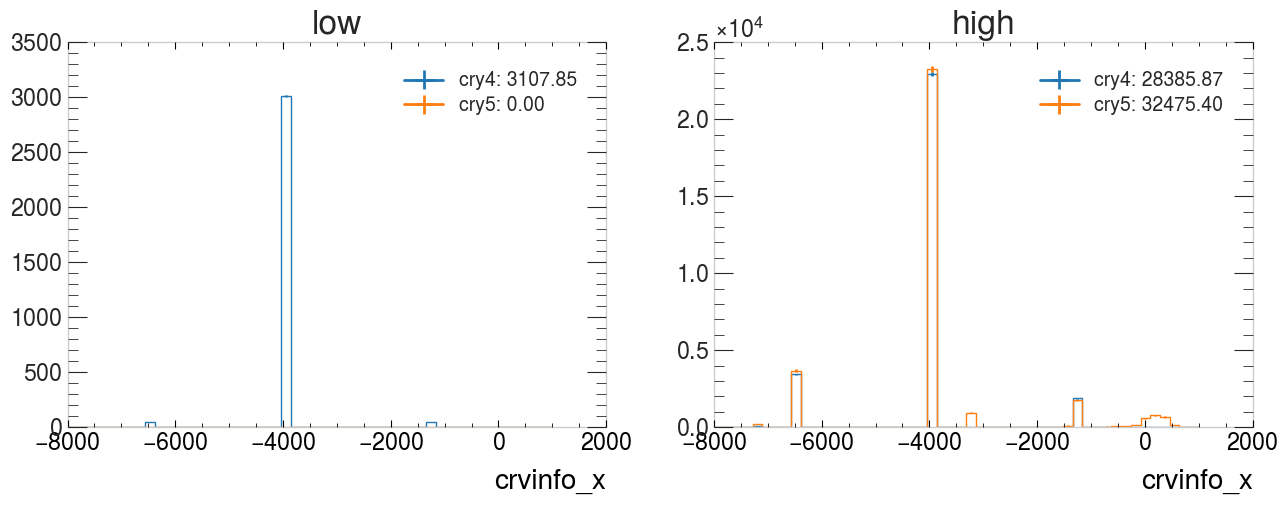

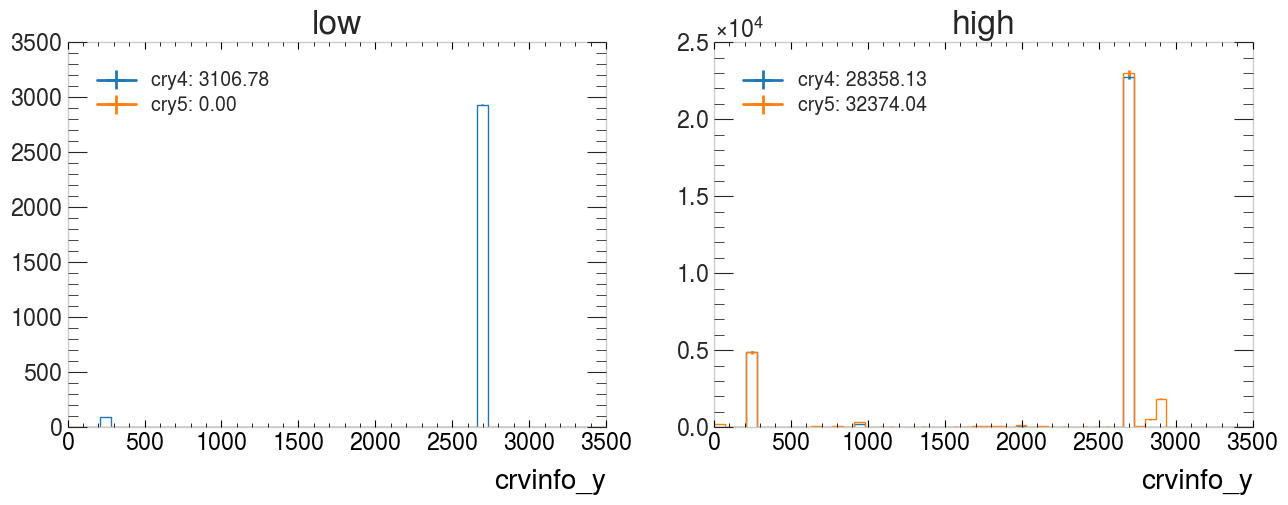

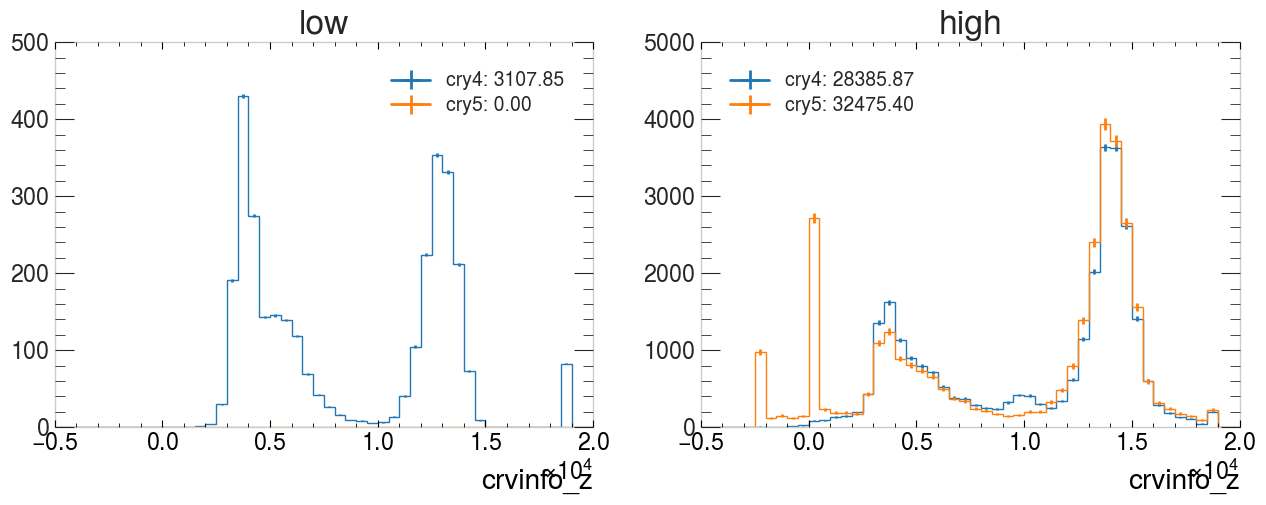

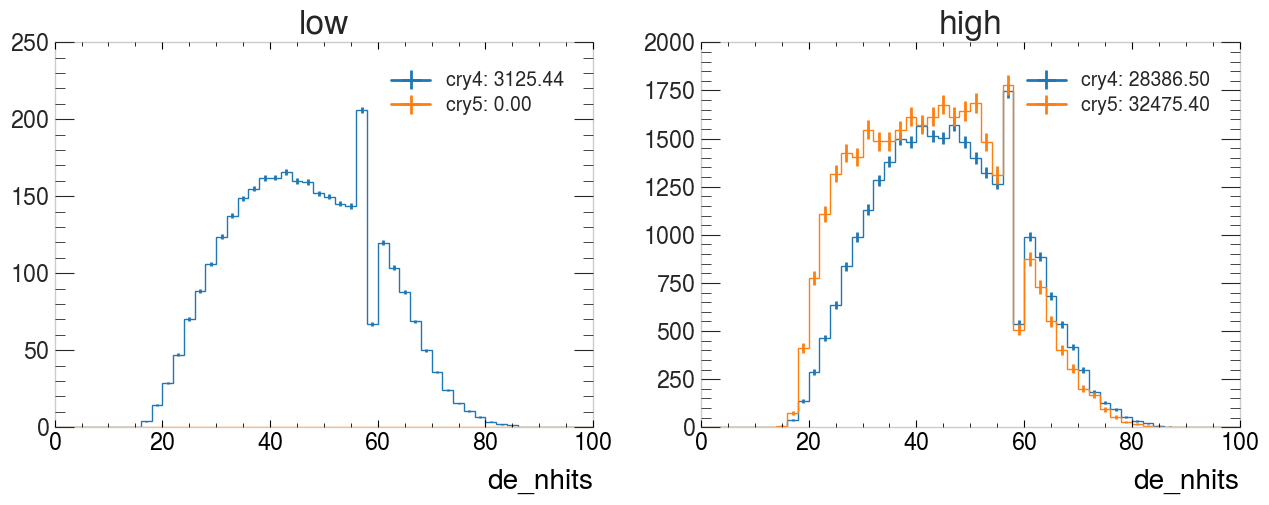

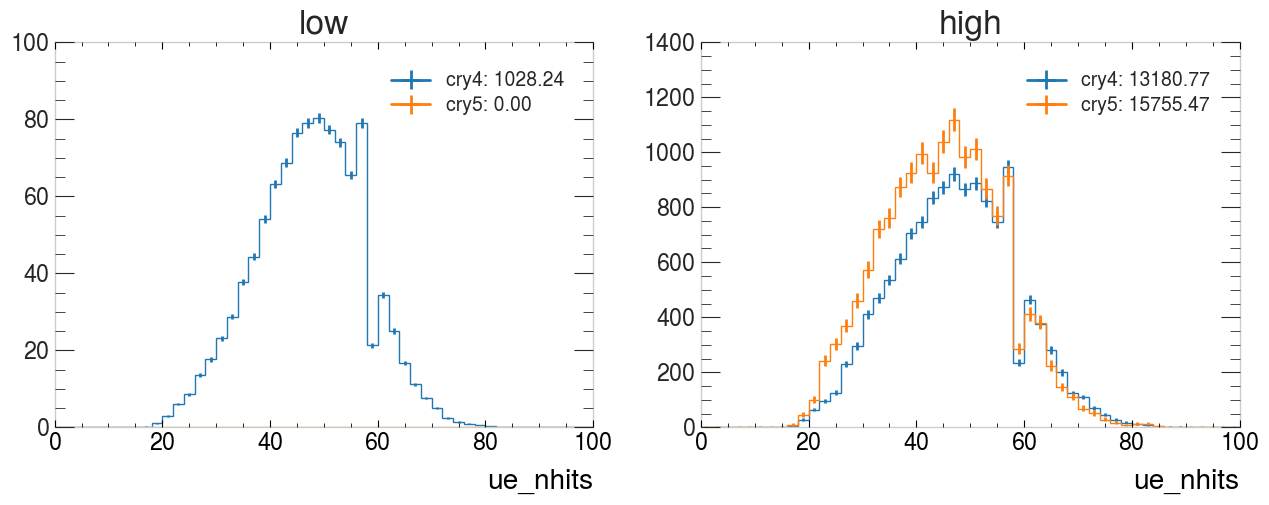

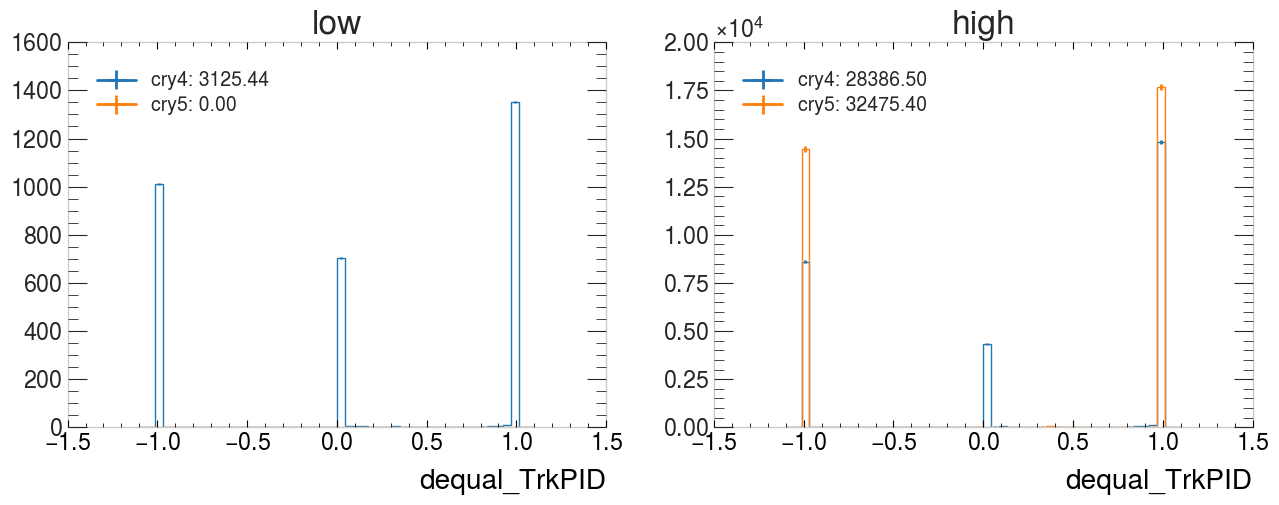

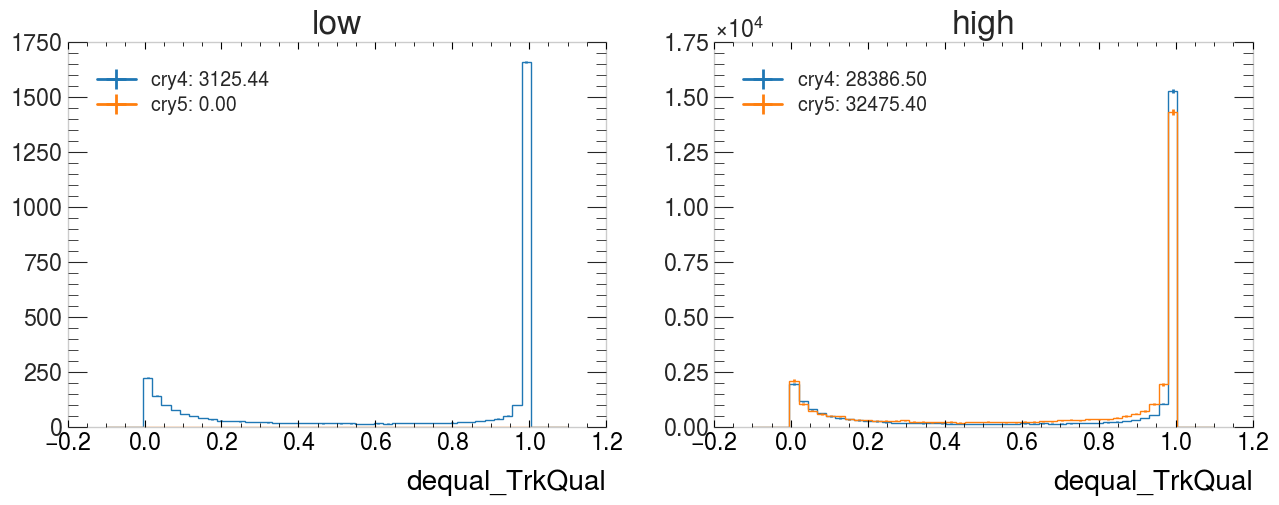

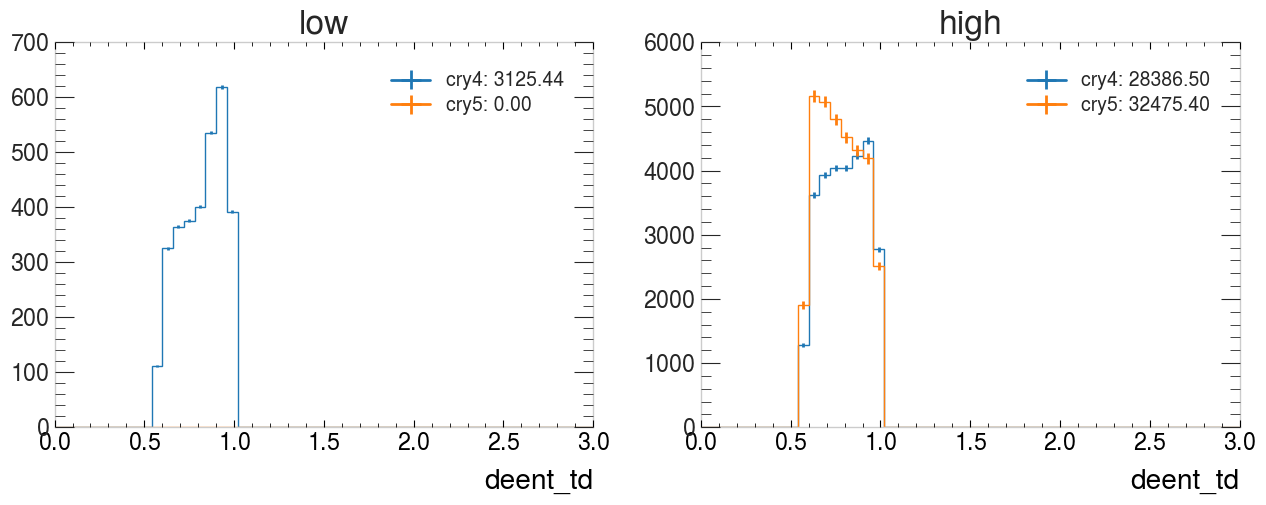

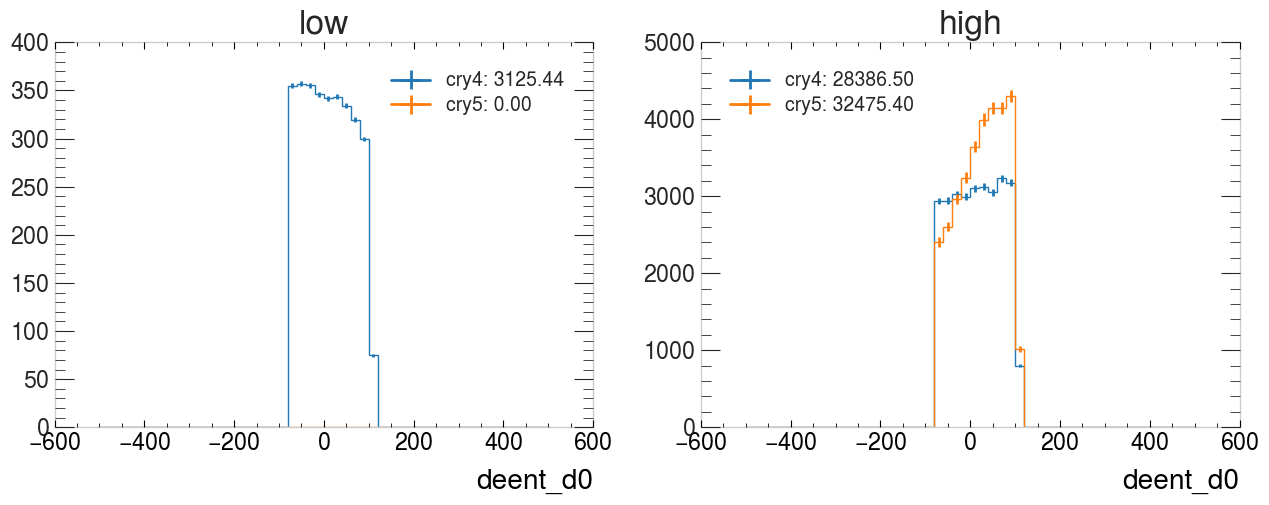

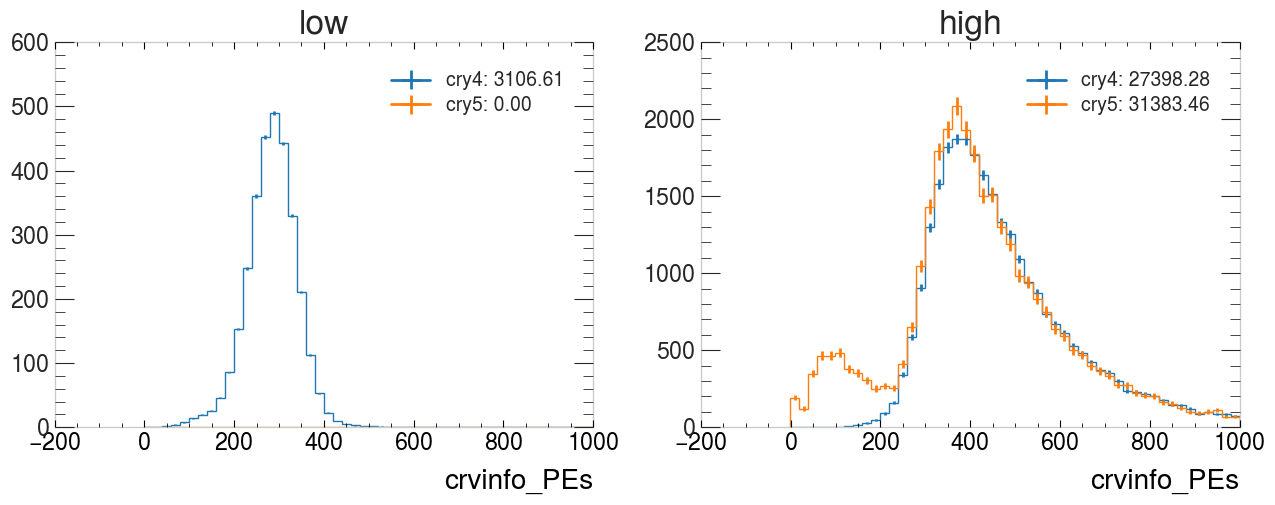

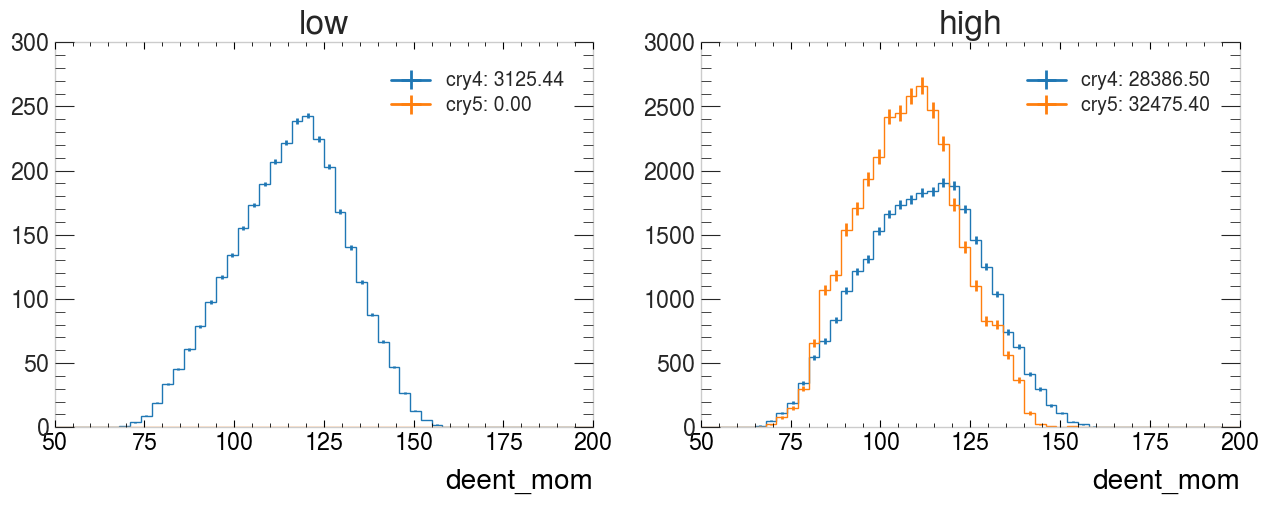

In [9]:
var_dict = utils.getVarList('allCRY5')

utils.LIVETIME_LO_CRY5 = 1.15E8*780/907
utils.LIVETIME_HI_CRY5 = 3.83E6*190/323

nLTimesCRY4 = [utils.LIVETIME_LO/utils.LIVETIME_MU2E, utils.LIVETIME_HI/utils.LIVETIME_MU2E]
nLTimesCRY5 = [utils.LIVETIME_LO_CRY5/utils.LIVETIME_MU2E, utils.LIVETIME_HI_CRY5/utils.LIVETIME_MU2E]

title=["low", "high"]

for var in var_dict.keys():
  if "deent_z0" in var or "deent_om" in var or "crvinfo_dTs" in var: 
    continue

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
  h = hist.Hist(
    hist.axis.StrCategory(["cry4", "cry5"], name="cat"),
    hist.axis.Regular(50, var_dict[var][0], var_dict[var][1], name="x", label="w [units]"),
    hist.storage.Weight(),
  ) 

  cut_tmp='(deent_mom > 100) & (deent_mom < 110)'
  for i in [0,1]:
    h.reset()
    h.fill(cat="cry4", x=dfCRY4.query(cut_tbox + '& is_high==%d'%i)[var].to_numpy())
    h.fill(cat="cry5", x=dfCRY5.query(cut_tbox + '& is_high==%d'%i)[var].to_numpy())

    h_tmp=(h["cry4", :] / nLTimesCRY4[i])
    h_tmp.plot(ax=axes[i], label='cry4: %.2f'%h_tmp.counts().sum())
    h_tmp=(h["cry5", :] / nLTimesCRY5[i])
    h_tmp.plot(ax=axes[i], label='cry5: %.2f'%h_tmp.counts().sum())

    axes[i].set_xlabel(var)
    axes[i].set_title(title[i])
    axes[i].legend()


In [10]:
df = dfCRY5

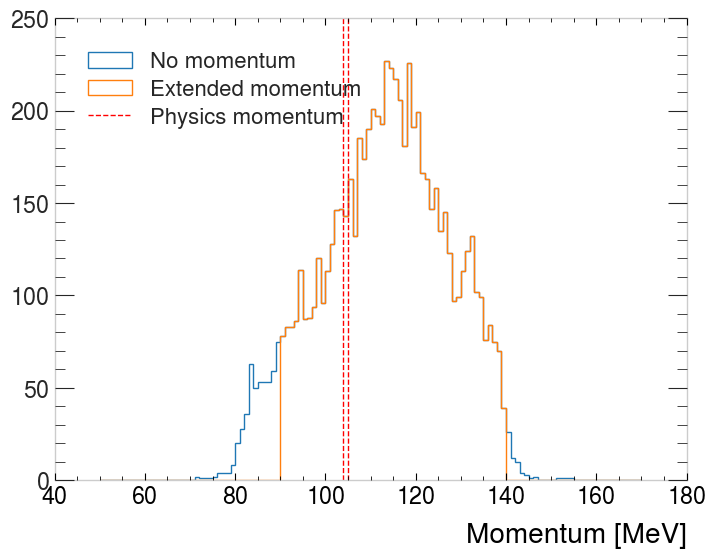

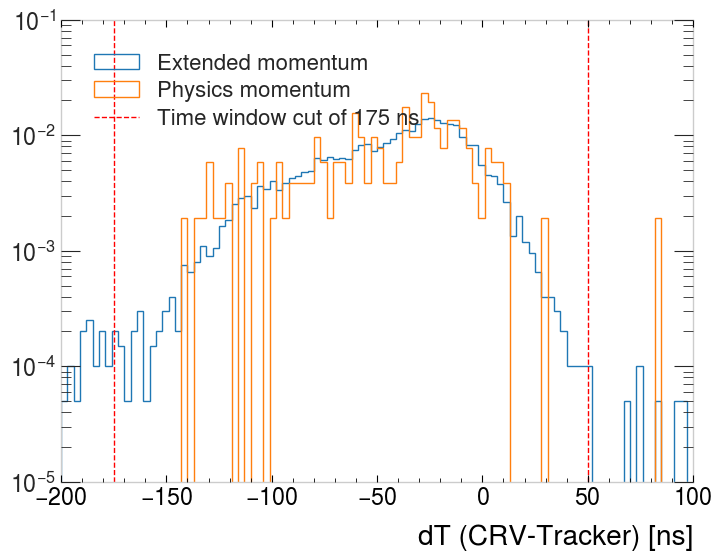

In [11]:
neve_extmom = len(df.query(cut_extmom))
neve_physmom = len(df.query(cut_phymom))
mom_scale = neve_extmom/neve_physmom
label = r'$\frac{P_{ext}}{P_{phy}} = %.1f$' % mom_scale
_, bins, _ = plt.hist(df.query(cut_nomom)['deent_mom'], bins=120, range=[50, 170], histtype='step', label='No momentum');
plt.hist(df.query(cut_extmom)['deent_mom'], bins=bins, histtype='step', label='Extended momentum');
plt.axvline(PMIN_PHY, color='r', linestyle='--', linewidth=1)
plt.axvline(PMAX_PHY, color='r', linestyle='--', label='Physics momentum', linewidth=1)
plt.legend(loc='upper left', prop={'size': 16})
plt.xlabel('Momentum [MeV]')

plt.figure()
plt.hist(df.query(cut_extmom)['crvinfo_dT'], bins=100, range=(-200, 100), histtype='step', density=True, label='Extended momentum');
plt.hist(df.query(cut_phymom)['crvinfo_dT'], bins=100, range=(-200, 100), histtype='step', density=True, label='Physics momentum');
plt.axvline(TMIN, color='r', linestyle='--', linewidth=1)
plt.axvline(TMAX, color='r', linestyle='--', linewidth=1, label='Time window cut of 175 ns')
plt.yscale('log')
plt.xlabel('dT (CRV-Tracker) [ns]');
plt.legend(loc='upper left', prop={'size': 16})

#Background estimation: production sources

In [12]:
def plot_background(cut_query, title, altitude_scale, log_scale=True, make_plot=True):

  lyield_scale=0.001726
  bg_ave = []
  pe_ave = []
  bg_err = []

  for ly in range(7000,17001,2000):
    bg = utils.getNormBackground(df, cut_query+" & lyield =="+str(ly), mom_scale, utils.LIVETIME_LO_CRY5, utils.LIVETIME_HI_CRY5)
    bg_ave.append(bg[0]*altitude_scale)
    pe_ave.append(ly*lyield_scale)
    bg_err.append(bg[1]*math.sqrt(altitude_scale))
    print("PE: %.1f, bg: %3.4f, err: %3.4f" % (ly*lyield_scale, bg[0]*altitude_scale, bg[1]))

  if make_plot:
    plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k');
    plt.title(title)
  if log_scale:
    plt.yscale('log')
  return (bg_ave, pe_ave, bg_err)

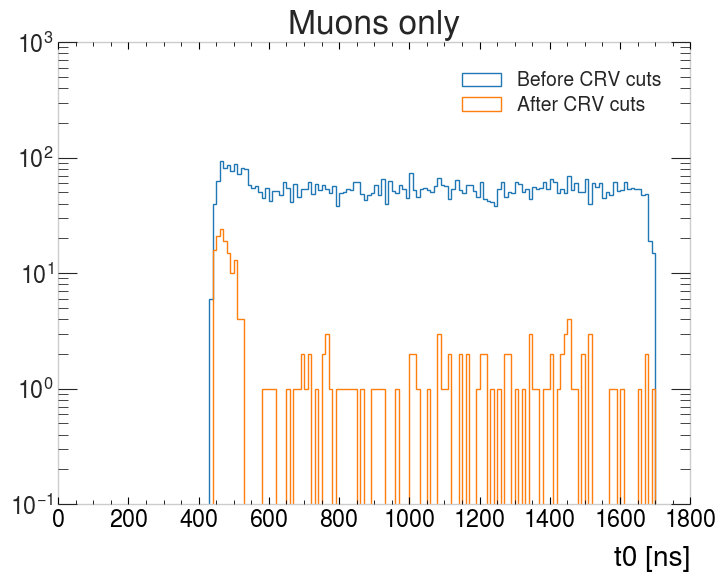

In [13]:
plt.hist(df.query(cut_extmom+" & abs(demcpri_pdg) == 13")['de_t0'], bins=170, range=(0, 1700), histtype='step', label='Before CRV cuts');
plt.hist(df.query(cut_current+" & abs(demcpri_pdg) == 13")['de_t0'], bins=170, range=(0, 1700), histtype='step', label='After CRV cuts');
plt.xlabel('t0 [ns]')
plt.title('Muons only')
plt.legend()
plt.yscale('log')

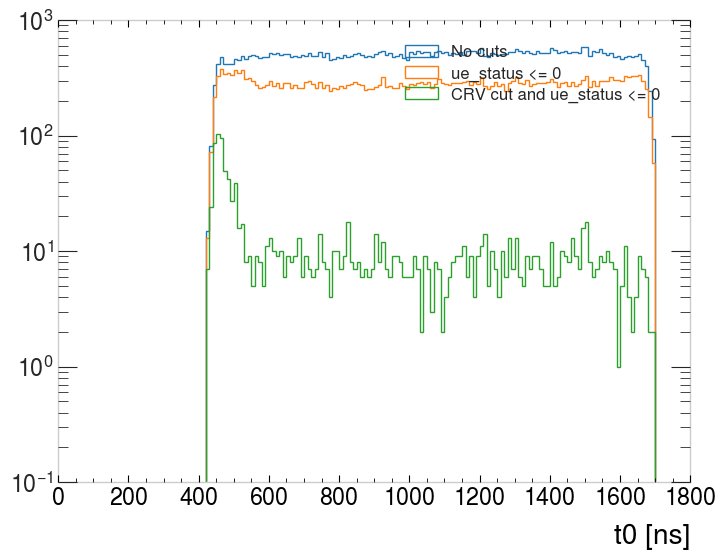

In [14]:
plt.hist(df['de_t0'], bins=170, range=(0, 1700), histtype='step', label='No cuts');
plt.hist(df.query('ue_status <= 0')['de_t0'], bins=170, range=(0, 1700), histtype='step', label='ue_status <= 0');
plt.hist(df.query('ue_status <= 0 &'+crv_time)['de_t0'], bins=170, range=(0, 1700), histtype='step', label='CRV cut and ue_status <= 0 ');
plt.xlabel('t0 [ns]')
plt.legend(prop={'size': 12});
plt.yscale('log')

In [15]:
h = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(10, 400, 1800, name="x", label="t0 [ns]"),
  hist.storage.Weight(),
) 
h2 = hist.Hist(
  hist.axis.StrCategory(["all", "cut", "all", "cut"], name="cat"),
  hist.axis.Regular(10, 400, 1800, name="x", label="t0 [ns]"),
  hist.storage.Weight(),
) 

#'''
TMIN = -160
TMAX = 140
crv_time = "(de_t0 < crvinfo_timeWindowStart + %d | de_t0 > crvinfo_timeWindowEnd + %d)" % (TMIN, TMAX)

cut_tmp='ue_status <= 0 & crvsummarymc_z>-9999 & abs(demcpri_pdg) == 13'
cut_tmp_PEs=cut_tmp+'& crvinfo_PEs==0'
cut_tmp_time=cut_tmp+ '&' + crv_time

h.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5)
h.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5)
h.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp_PEs + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5);
h.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp_PEs + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5);

h2.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5)
h2.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5)
h2.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp_time + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5);
h2.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp_time + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5);

#'''
'''
cut_tmp='ue_status <= 0 & crvsummarymc_z>-9999 & abs(demcpri_pdg) == 13'
h.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5)
h.fill(cat="all", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5)
#cut_tmp = cut_tmp +'&'+crv_time
cut_tmp = cut_tmp+'& crvinfo_PEs==0'
h.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==0')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5);
h.fill(cat="cut", x=dfCRY5.query(cut_tbox+'&' + cut_tmp + '& is_high==1')['de_t0'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5);
'''

'\ncut_tmp=\'ue_status <= 0 & crvsummarymc_z>-9999 & abs(demcpri_pdg) == 13\'\nh.fill(cat="all", x=dfCRY5.query(cut_tbox+\'&\' + cut_tmp + \'& is_high==0\')[\'de_t0\'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5)\nh.fill(cat="all", x=dfCRY5.query(cut_tbox+\'&\' + cut_tmp + \'& is_high==1\')[\'de_t0\'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5)\n#cut_tmp = cut_tmp +\'&\'+crv_time\ncut_tmp = cut_tmp+\'& crvinfo_PEs==0\'\nh.fill(cat="cut", x=dfCRY5.query(cut_tbox+\'&\' + cut_tmp + \'& is_high==0\')[\'de_t0\'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_LO_CRY5);\nh.fill(cat="cut", x=dfCRY5.query(cut_tbox+\'&\' + cut_tmp + \'& is_high==1\')[\'de_t0\'].to_numpy(), weight=utils.LIVETIME_MU2E/utils.LIVETIME_HI_CRY5);\n'

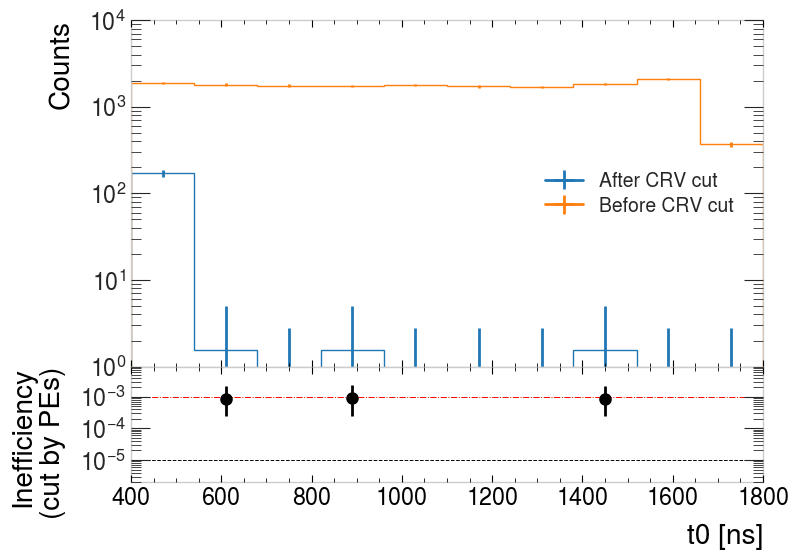

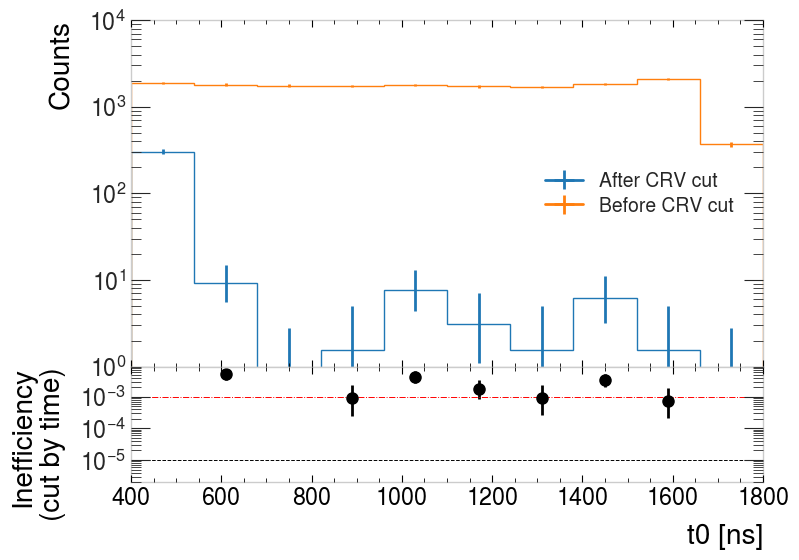

In [16]:
import matplotlib.ticker

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

def plot_efficiency(hist, cut_type):
  fig = plt.figure()
  hist["cut", :].plot_ratio(hist["all", :], rp_num_label="After CRV cut", rp_denom_label="Before CRV cut", rp_ylim=[0.000002, 0.009], rp_uncert_draw_type='line');

  fig.get_axes()[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
  fig.get_axes()[1].set_ylabel('Inefficiency\n(' + cut_type + ')')
  fig.get_axes()[1].set_yscale('log')
  fig.get_axes()[0].set_yscale('log')
  fig.get_axes()[1].axhline(0.00001,color='black',ls='--', linewidth=0.7)
  fig.get_axes()[1].axhline(0.001,color='red',ls='-.', linewidth=0.7)

plot_efficiency(h,"cut by PEs")
plot_efficiency(h2,"cut by time")


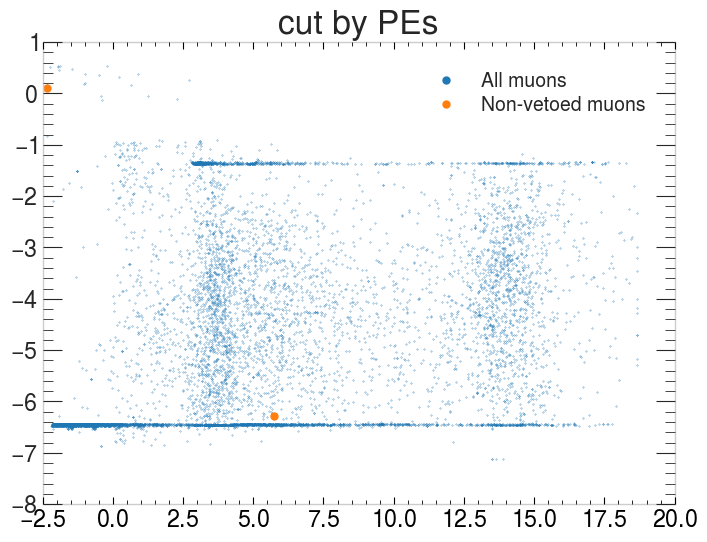

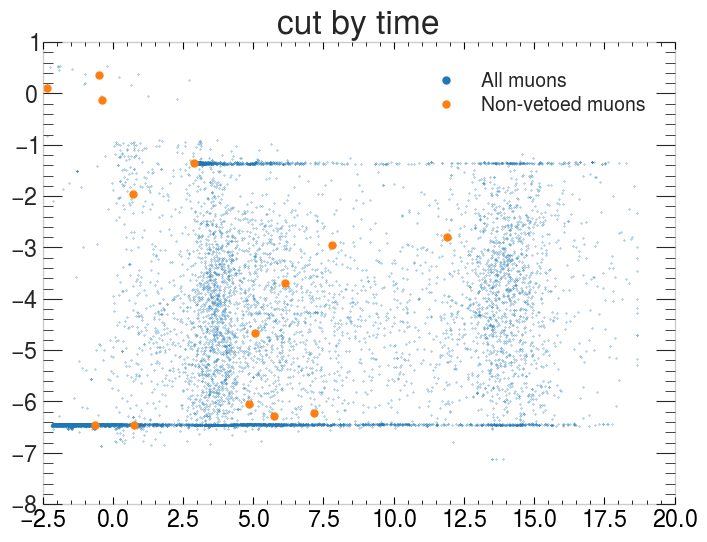

In [17]:
cut_tmp=cut_tbox+'& ue_status <= 0 & abs(demcpri_pdg) == 13 & crvsummarymc_z>-9999 &'+cut_t0
cut_tmp_PEs=cut_tmp+'& crvinfo_PEs==0'
cut_tmp_time=cut_tmp+ '&' + crv_time

def plot_events_map(cut, cut_name): 
  fig = plt.figure()
  plt.plot(dfCRY5.query(cut_tmp)['crvsummarymc_z']/1000, dfCRY5.query(cut_tmp)['crvsummarymc_x']/1000, '.', label='All muons', markersize=0.5)
  plt.plot(dfCRY5.query(cut)['crvsummarymc_z']/1000, dfCRY5.query(cut)['crvsummarymc_x']/1000, '.', label='Non-vetoed muons', markersize=10)
  plt.legend();
  lgnd = plt.legend()
  lgnd.legendHandles[0].set_markersize(10)
  plt.title(cut_name)
  
plot_events_map(cut_tmp_PEs,"cut by PEs")
plot_events_map(cut_tmp_time,"cut by time")

In [32]:
dfCRY5.query(cut_tmp_PEs)

,evtinfo_eventid,evtinfo_subrunid,evtinfomc_nprotons,de_status,de_pdg,de_nhits,de_t0,deent_d0,deent_maxr,deent_td,dequal_TrkPID,dequal_TrkQual,demc_pdg,demcpri_pdg,demcpri_posX,demcpri_posY,demcpri_posZ,ue_status,ue_nhits,crvsummary_totalPEs,crvsummary_nHitCounters,crvsummarymc_totalEnergyDeposited,crvsummarymc_nHitCounters,crvsummarymc_x,crvsummarymc_y,crvsummarymc_z,crvsummarymc_crvSectorNumber,crvsummarymc_crvSectorType,crvsummarymc_pdgId,detrkpid_DeltaE,detrkpid_ClusterLength,detrkpid_RPOCA,detrkpid_TrackDirection,detrkpid_DeltaT,detrkpid_mvaout,detrkpid_mvastat,detrkpid_disk0frad,detrkpid_disk1frad,detrkpid_disk0brad,detrkpid_disk1brad,deent_mom,demcpri_mom,crvinfo_crvSectorType,crvinfo_x,crvinfo_y,crvinfo_z,crvinfo_timeWindowStart,crvinfo_timeWindowEnd,crvinfo_PEs,crvinfo_nCoincidenceHits,crvinfo_nCoincidenceLayers,crvinfo_angle,crvinfomc_valid,crvinfomc_pdgId,crvinfomc_primaryPdgId,crvinfomc_primaryE,crvinfomc_primaryX,crvinfomc_primaryY,crvinfomc_primaryZ,crvinfomc_parentPdgId,crvinfomc_parentE,crvinfomc_parentX,crvinfomc_parentY,crvinfomc_parentZ,crvinfomc_gparentPdgId,crvinfomc_gparentE,crvinfomc_gparentX,crvinfomc_gparentY,crvinfomc_gparentZ,crvinfomc_x,crvinfomc_y,crvinfomc_z,crvinfomc_time,crvinfomc_depositedEnergy,is_high,lyield,crvinfo_dT,crvinfo_dTe
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46174,198640,5100,9641262,1,11,27,1507.658203,34.682739,469.942596,0.786776,0.999999,0.976718,11,-13,-21231.251953,15365.400391,-24318.923828,-1000,-1,0,0,44.897883,6,-6277.332031,2673.110107,5747.098633,11,3,-13,-12.119759,138.581055,466.432281,-0.356932,3.080996,0.999999,2,378.907288,429.308899,156.453186,479.586273,83.988350,4448.372070,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,-999.0,False,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,17000,-1507.658203,-1507.658203
58176,316892,2716,30037287,1,11,43,890.647522,-2.430365,554.192261,0.919557,-1.000000,0.981203,13,13,26033.107422,15365.400391,-55166.613281,-1000,-1,0,0,19.443528,4,105.478615,330.682068,-2359.959961,14,5,13,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0,552.559021,64.618050,482.320801,158.489212,114.676048,10607.804688,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,-999.0,False,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,17000,-890.647522,-890.647522


In [31]:
dfCRY5.query(cut_tmp_time)

,evtinfo_eventid,evtinfo_subrunid,evtinfomc_nprotons,de_status,de_pdg,de_nhits,de_t0,deent_d0,deent_maxr,deent_td,dequal_TrkPID,dequal_TrkQual,demc_pdg,demcpri_pdg,demcpri_posX,demcpri_posY,demcpri_posZ,ue_status,ue_nhits,crvsummary_totalPEs,crvsummary_nHitCounters,crvsummarymc_totalEnergyDeposited,crvsummarymc_nHitCounters,crvsummarymc_x,crvsummarymc_y,crvsummarymc_z,crvsummarymc_crvSectorNumber,crvsummarymc_crvSectorType,crvsummarymc_pdgId,detrkpid_DeltaE,detrkpid_ClusterLength,detrkpid_RPOCA,detrkpid_TrackDirection,detrkpid_DeltaT,detrkpid_mvaout,detrkpid_mvastat,detrkpid_disk0frad,detrkpid_disk1frad,detrkpid_disk0brad,detrkpid_disk1brad,deent_mom,demcpri_mom,crvinfo_crvSectorType,crvinfo_x,crvinfo_y,crvinfo_z,crvinfo_timeWindowStart,crvinfo_timeWindowEnd,crvinfo_PEs,crvinfo_nCoincidenceHits,crvinfo_nCoincidenceLayers,crvinfo_angle,crvinfomc_valid,crvinfomc_pdgId,crvinfomc_primaryPdgId,crvinfomc_primaryE,crvinfomc_primaryX,crvinfomc_primaryY,crvinfomc_primaryZ,crvinfomc_parentPdgId,crvinfomc_parentE,crvinfomc_parentX,crvinfomc_parentY,crvinfomc_parentZ,crvinfomc_gparentPdgId,crvinfomc_gparentE,crvinfomc_gparentX,crvinfomc_gparentY,crvinfomc_gparentZ,crvinfomc_x,crvinfomc_y,crvinfomc_z,crvinfomc_time,crvinfomc_depositedEnergy,is_high,lyield,crvinfo_dT,crvinfo_dTe
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2333,247770,14173,25944890,1,11,22,1559.416260,63.110260,470.247864,0.833804,0.999981,0.977481,11,13,4560.914062,15365.400391,-12152.987305,-1000,-1,488,10,29.442907,10,-3694.519531,2673.110107,6116.101562,11,3,13,-9.511536,34.466583,481.470123,-0.222975,3.112189,0.999981,2,479.440247,259.118622,372.776581,438.687561,80.389687,3908.552002,3,-3904.000000,2712.665039,6092.093750,993.615601,1081.465576,415,16,4,-0.351023,True,13,13,3804.321533,656.914307,15365.400391,-1981.987183,13,3804.321533,656.914307,15365.400391,-1981.987183,13,3804.321533,656.914307,15365.400391,-1981.987183,-3662.688965,2761.084961,6058.587891,6.056124e+03,19.156019,1,17000,-565.800659,-477.950684
7893,17786,22374,38850884,1,11,23,972.233398,39.984070,471.638428,0.725666,0.999987,0.502765,11,-13,-9485.054688,15365.400391,-10523.647461,-1000,-1,2636,39,420.656721,43,-4665.241699,2673.110107,5051.603027,10,3,-13,-10.254448,26.160362,445.106720,0.369677,2.806857,0.999987,2,436.704895,114.329010,468.413574,368.401123,80.880241,1663.069702,4,211.679276,2875.993164,213.199997,422.923615,736.673584,837,44,4,1.602416,True,11,22,7.643675,1613.894897,3001.752686,-1635.663818,22,7.643675,1613.894897,3001.752686,-1635.663818,22,7.643675,1613.894897,3001.752686,-1635.663818,-23.904165,2870.826172,-812.544800,5.399825e+02,102.543098,1,17000,-549.309814,-235.559814
11441,291501,14230,28080061,1,11,16,1139.548218,64.551430,459.987030,0.681716,0.999977,0.010610,11,13,-9193.707031,15365.400391,-7960.096191,-1000,-1,345,4,16.828409,4,-6044.736328,2673.110107,4849.349121,10,3,13,-7.689735,-4.716183,445.166840,0.063256,3.564795,0.999977,2,455.190002,332.686462,389.141815,461.815887,72.577240,4559.213379,3,-3904.000000,2701.972168,4851.647461,526.590515,614.440491,350,16,4,-0.376598,True,13,13,4454.786133,-13097.707031,15365.400391,2210.903809,13,4454.786133,-13097.707031,15365.400391,2210.903809,13,4454.786133,-13097.707031,15365.400391,2210.903809,-6093.143066,2761.084961,4831.443848,3.271003e+04,16.828409,1,17000,-612.957703,-525.107727
13265,479133,6188,20375011,1,11,28,1507.001465,35.064266,469.826752,0.788387,0.999999,0.993096,11,13,3813.534912,15365.400391,13381.913086,-1000,-1,92,4,15.865166,4,362.124512,2836.757568,-502.956207,12,4,2212,-9.439087,139.413177,466.483582,-0.367042,3.197197,0.999999,2,379.004608,429.835327,156.290024,479.526978,83.958107,1558.807617,4,244.778152,2873.725586,213.199997,1711.363892,1774.113892,82,6,4,-3.200147,True,2212,2112,17.059275,931.980835,2790.737305,97.144775,2112,17.059275,931.980835,2790.737305,97.144775,2112,17.059275,931.980835,2790.737305,97.144775,103.787659,2925.811279,-2125.636963,

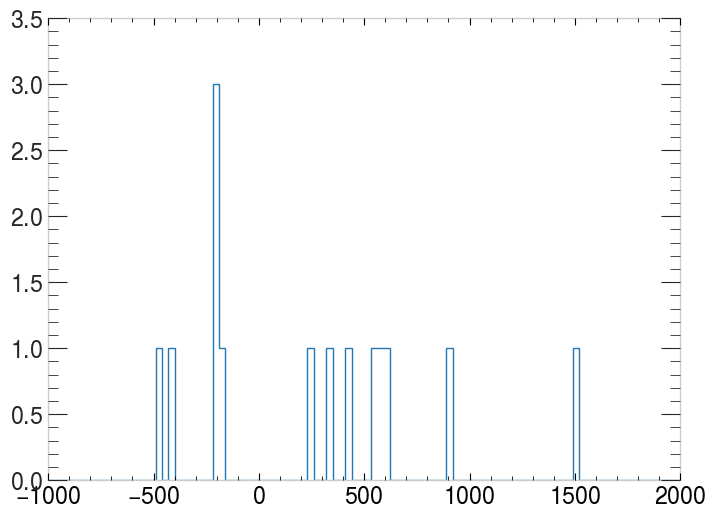

In [46]:
plt.hist(df.query(cut_tmp_time)['de_t0']-df.query(cut_tmp_time)['crvinfo_timeWindowStart'], range=(-1000, 2000), bins=100, histtype='step');



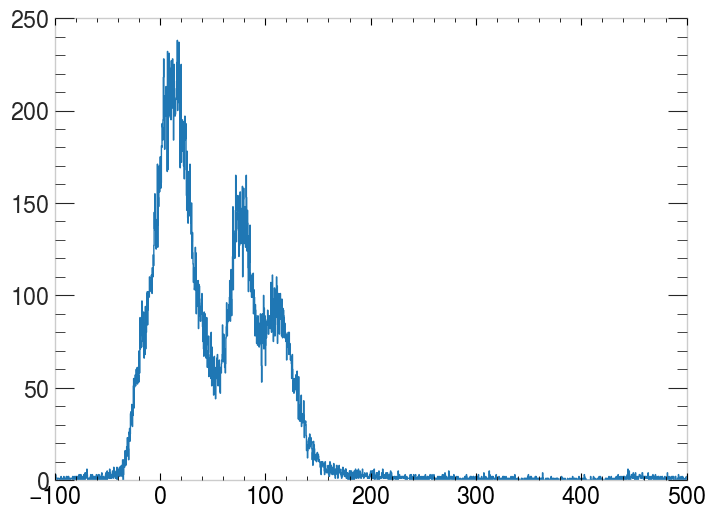

In [44]:
plt.hist(df['de_t0']-df['crvinfo_timeWindowStart'], range=(-100, 500), bins=2000, histtype='step');


In [19]:
dfCRY5.query(cut_current+"& "+cut_t0+" & abs(demcpri_pdg) == 13 & crvsummarymc_z>-9999")

,evtinfo_eventid,evtinfo_subrunid,evtinfomc_nprotons,de_status,de_pdg,de_nhits,de_t0,deent_d0,deent_maxr,deent_td,...,crvinfomc_gparentZ,crvinfomc_x,crvinfomc_y,crvinfomc_z,crvinfomc_time,crvinfomc_depositedEnergy,is_high,lyield,crvinfo_dT,crvinfo_dTe
entry,,,,,,,,,,,,,,,,,,,,,
271,440908,23652,41707984,1,11,66,1341.331909,26.989771,640.103821,0.691525,...,-4038.984619,383.825623,2840.008057,-1396.437012,7961.154785,58.439789,1,17000,-185.818970,-10.119019
928,465023,25683,45688696,1,11,23,1351.430664,59.553539,495.889130,0.946583,...,1928.750366,-1040.048950,2921.201660,-635.354736,51904.664062,18.275383,1,17000,-187.449951,-36.849976
1901,174330,262,50366735,1,11,44,1401.688110,-36.638763,578.322815,0.917431,...,-5335.356934,318.980255,2863.548340,823.033691,1242.136353,56.189732,1,17000,-263.783691,-0.233765
2097,211306,22011,62810207,1,11,57,1080.423462,88.233398,650.731873,0.851751,...,-1013.304626,310.768250,2901.876709,-2107.607422,945.218872,71.722229,1,17000,-339.580017,24.369873
2264,97052,6142,78394940,1,11,58,1650.049805,-66.348465,657.634094,0.790785,...,-357.887939,196.811584,2829.058838,-1618.428223,-3.059156,59.705910,1,17000,-219.457275,18.992798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58233,170541,5715,45154194,1,11,31,768.724121,-1.152928,513.176453,0.951839,...,-2640.008789,431.775330,2828.049072,606.350342,446.217682,67.272560,1,17000,-182.613220,5.636780
58355,68231,20318,41335158,1,11,38,1052.438721,-42.916557,571.448364,0.962070,...,-20.028776,415.449005,2865.536133,-2208.039062,752.333191,44.834305,1,17000,-377.752197,-1.252197
61396,213275,4771,44312024,1,11,65,1513.386230,-78.486000,637.267395,0.705628,...,1395.717285,413.545074,2830.311279,-312.375336,1357.421265,26.924648,1,17000,-207.580444,5.769653


PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 3.8092, err: 0.3824
PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 0.0000, err: 0.0000
PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 3.8092, err: 0.3824


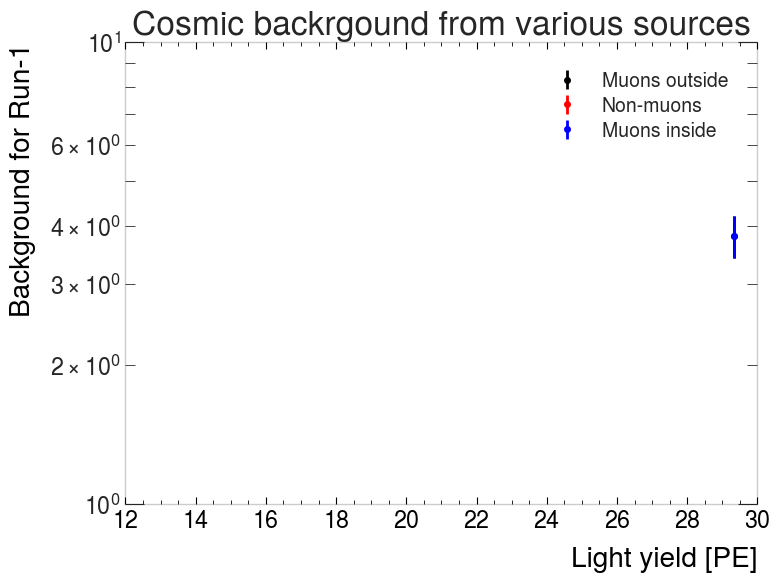

In [20]:
title='Muons outside'
bg_ave, pe_ave, bg_err = plot_background(cut_current+"& "+cut_t0+" & abs(demcpri_pdg) == 13", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k', label=title)

title = 'Non-muons'
bg_ave, pe_ave, bg_err = plot_background(cut_current+"& "+cut_t0+" & abs(demcpri_pdg) != 13", title, 1.2, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.r', label=title)

title='Muons inside'
bg_ave, pe_ave, bg_err = plot_background(cut_current+"& "+cut_t0+" & abs(demcpri_pdg) == 13 & crvsummarymc_z>-9999", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.b', label=title)

plt.yscale('log');
plt.title('Cosmic backrgound from various sources');
plt.xlabel('Light yield [PE]')
plt.ylabel('Background for Run-1');
plt.legend()

In [21]:
print("Efficiency: %2.2e"%(0.0058/248.5517))

Efficiency: 2.33e-05


PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 221.9813, err: 2.9913


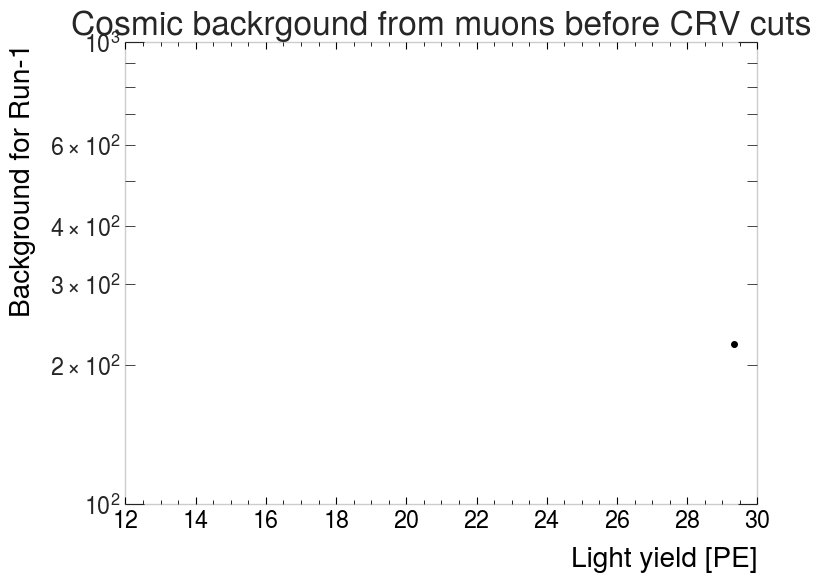

In [22]:
title='Muons'
bg_ave, pe_ave, bg_err = plot_background(cut_extmom+"& "+cut_t0+" & abs(demcpri_pdg) == 13", title, 1.0, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k', label=title)

plt.yscale('log');
plt.title('Cosmic backrgound from muons before CRV cuts');
plt.xlabel('Light yield [PE]')
plt.ylabel('Background for Run-1');

Text(0.5, 1.0, 'Background sources after kin and CRV cuts')

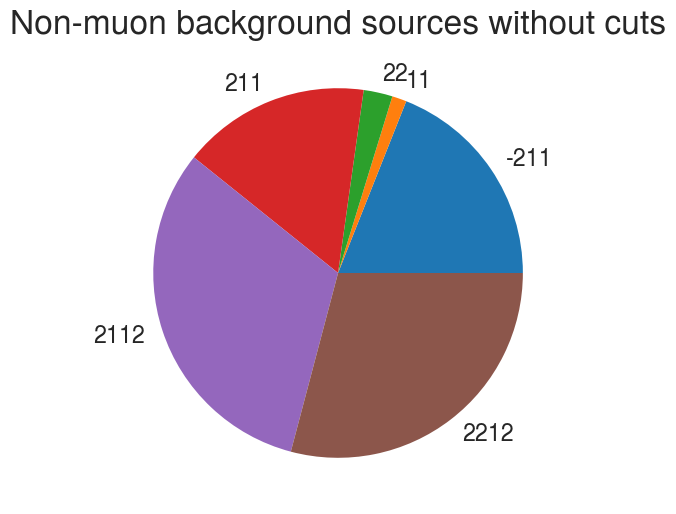

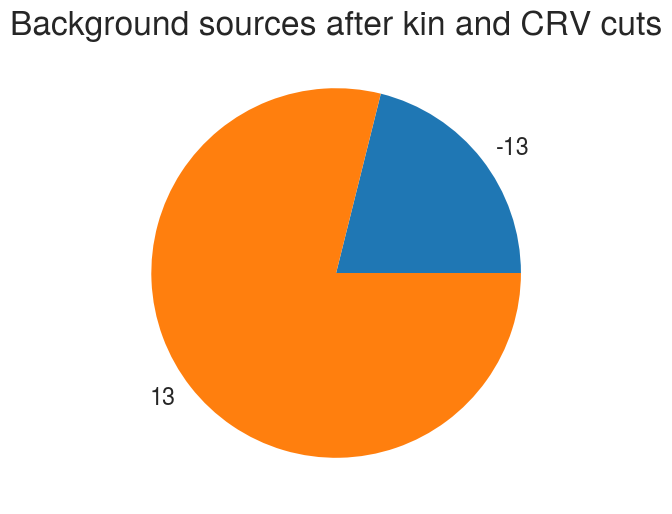

In [23]:
df.query('abs(demcpri_pdg) != 13').groupby(['demcpri_pdg']).size().plot(kind='pie', y='demcpri_pdg')
plt.ylabel('')
plt.title('Non-muon background sources without cuts')
plt.figure()
df.query(cut_current+"& "+cut_t0).groupby(['demcpri_pdg']).size().plot(kind='pie', y='demcpri_pdg', )
plt.ylabel("")
plt.title('Background sources after kin and CRV cuts')

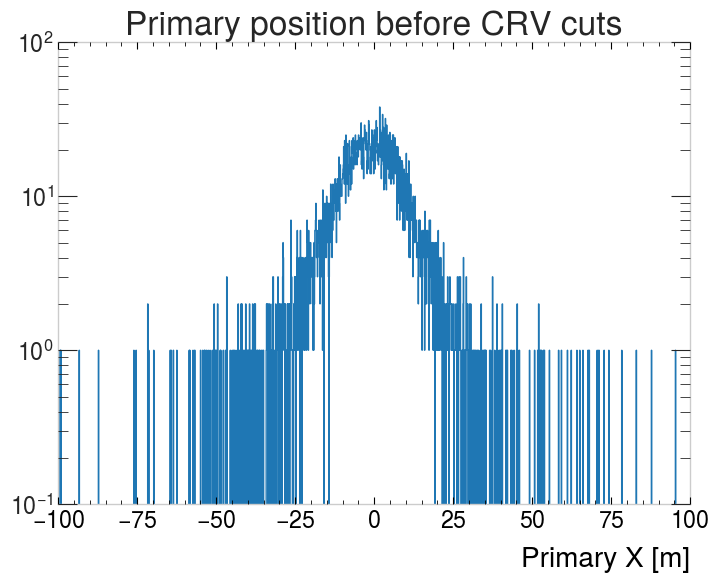

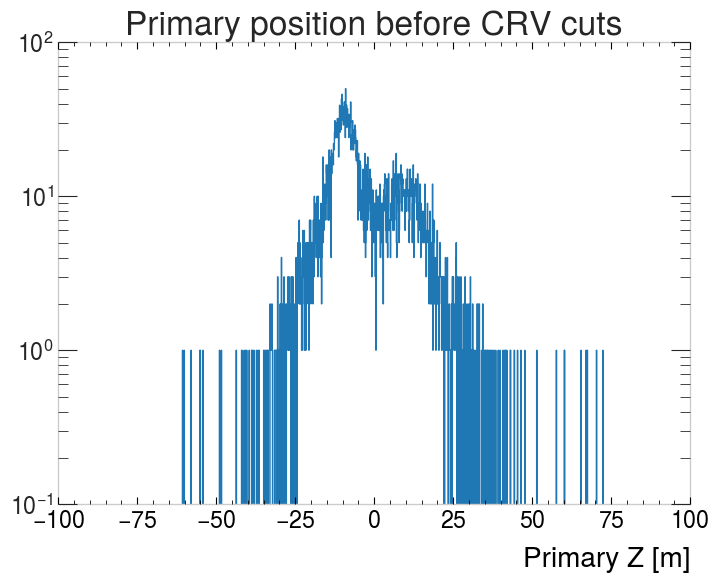

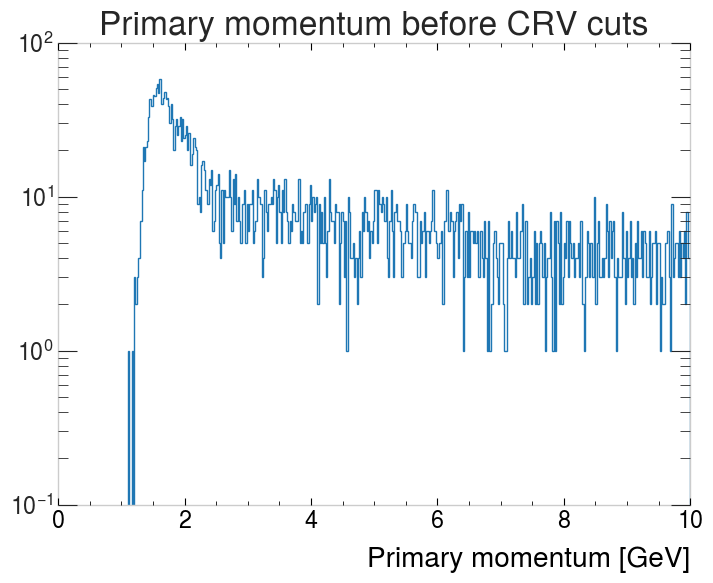

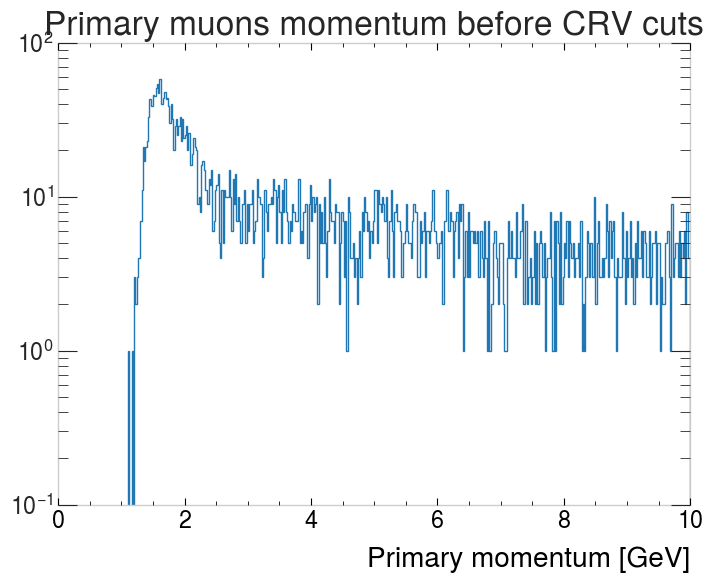

In [24]:
plt.hist(df.query(cut_extmom+"& "+cut_t0)['demcpri_posX']/1000, range=(-100, 100), bins=2000, histtype='step');
plt.yscale('log')
plt.title('Primary position before CRV cuts')
plt.xlabel('Primary X [m]')
plt.figure()
plt.hist(df.query(cut_extmom+"& "+cut_t0)['demcpri_posZ']/1000, range=(-100, 100), bins=2000, histtype='step');
plt.title('Primary position before CRV cuts')
plt.xlabel('Primary Z [m]')
plt.yscale('log')

plt.figure()
plt.hist(df.query(cut_extmom+"& "+cut_t0)['demcpri_mom']/1000, range=(0, 10), bins=500, histtype='step');
plt.title('Primary momentum before CRV cuts')
plt.xlabel('Primary momentum [GeV]')
plt.yscale('log')

plt.figure()
plt.hist(df.query(cut_extmom+"& abs(demcpri_pdg) == 13 &"+cut_t0)['demcpri_mom']/1000, range=(0, 10), bins=500, histtype='step');
plt.title('Primary muons momentum before CRV cuts')
plt.xlabel('Primary momentum [GeV]')
plt.yscale('log')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  import sys


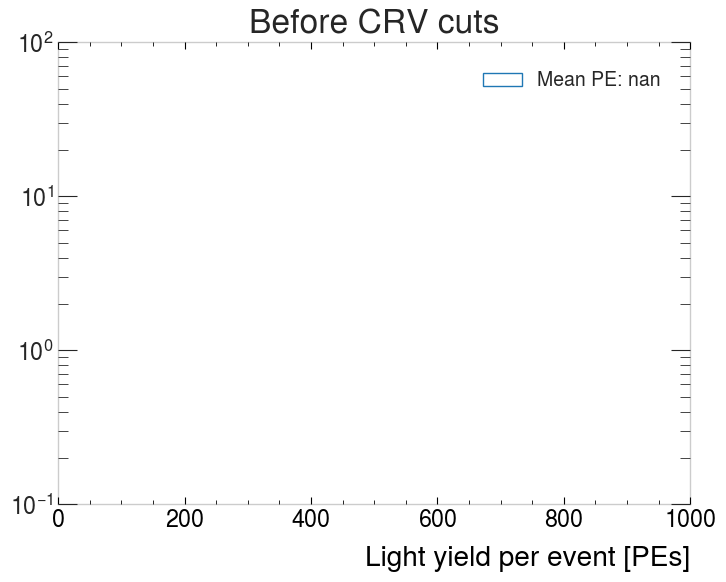

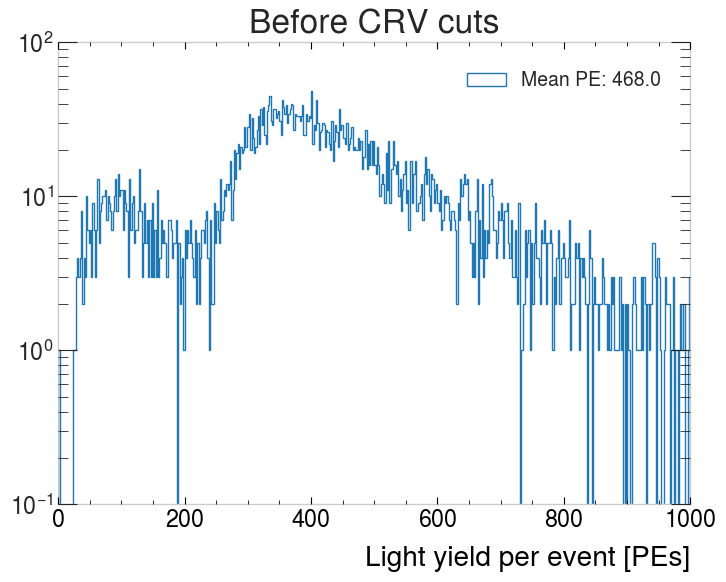

In [25]:
plt.figure()
label='Mean PE: %.1f'%(df.query(cut_extmom+" & is_high==0 & "+cut_t0)['crvinfo_PEs'].mean())
plt.hist(df.query(cut_extmom+"& is_high==0 &"+cut_t0)['crvinfo_PEs'], range=(0, 1000), bins=500, histtype='step', label=label);
plt.title('Before CRV cuts')
plt.xlabel('Light yield per event [PEs]')
plt.legend()
plt.yscale('log')

plt.figure()
label='Mean PE: %.1f'%(df.query(cut_extmom+" & is_high==1 & "+cut_t0)['crvinfo_PEs'].mean())
plt.hist(df.query(cut_extmom+"& is_high==1 &"+cut_t0)['crvinfo_PEs'], range=(0, 1000), bins=500, histtype='step', label=label);
plt.title('Before CRV cuts')
plt.xlabel('Light yield per event [PEs]')
plt.legend()
plt.yscale('log')

In [26]:
# Rare event induced by 0.5 GeV gamma
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
df.query(cut_extmom+"& abs(demcpri_pdg) != 13 & demcpri_mom<1000 &"+cut_t0)[['demcpri_mom', 'demcpri_pdg', 'crvinfo_PEs']]

,demcpri_mom,demcpri_pdg,crvinfo_PEs
entry,,,


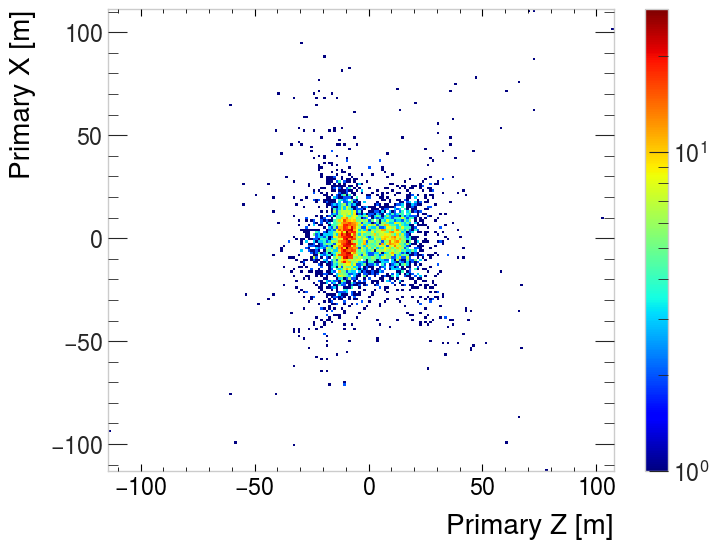

In [27]:

#fig, ax = plt.subplots()
h=plt.hist2d(df.query(cut_extmom)['demcpri_posZ']/1000, df.query(cut_extmom)['demcpri_posX']/1000, bins = 200, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.colorbar(h[3])
plt.xlabel('Primary Z [m]')
plt.ylabel('Primary X [m]');

#Calo variables

(0.0, 4.0)

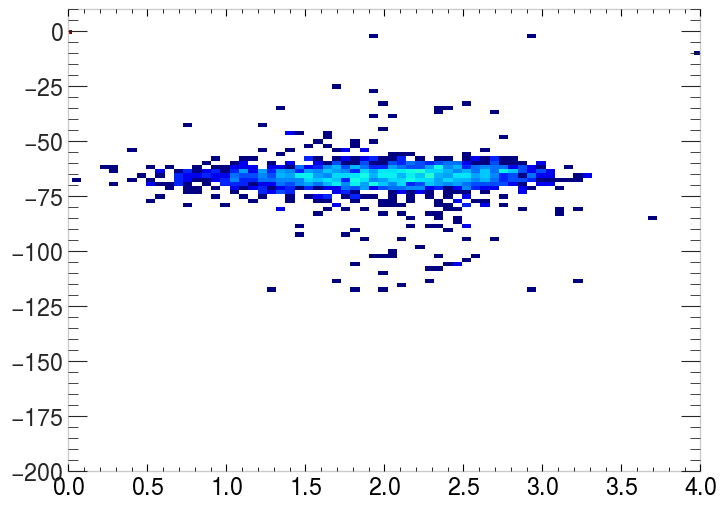

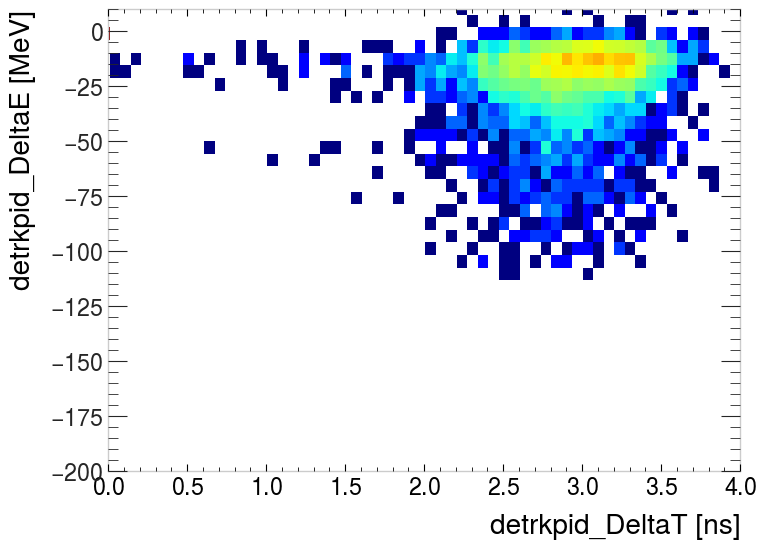

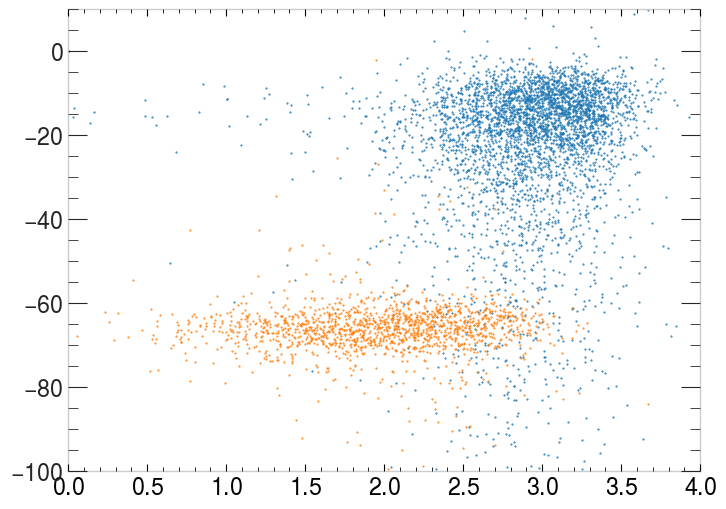

In [28]:
from matplotlib.patches import Rectangle

cuts = cut_extmom+'& abs(demc_pdg) == 13'
h=plt.hist2d(df.query(cuts)['detrkpid_DeltaT'], df.query(cuts)['detrkpid_DeltaE'], bins = 100, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.xlim(0,4)
plt.ylim(-200,10)
#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((-3, -60), 3, 60, fill=None, alpha=1, color='red'))

plt.figure()
cuts = cut_extmom+'& abs(demc_pdg) == 11'
h=plt.hist2d(df.query(cuts)['detrkpid_DeltaT'], df.query(cuts)['detrkpid_DeltaE'], bins = 100, norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);
plt.xlabel('detrkpid_DeltaT [ns]')
plt.ylabel('detrkpid_DeltaE [MeV]')
plt.xlim(0,4)
plt.ylim(-200,10)
#currentAxis = plt.gca()
#currentAxis.add_patch(Rectangle((-3, -60), 3, 60, fill=None, alpha=1, color='red'))


plt.figure()
plt.plot(df.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], df.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaE'], '.', markersize=1.0);
plt.plot(df.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaT'], df.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaE'], '.', markersize=1.0);
plt.ylim(-100, 10)
plt.xlim(0, 4)


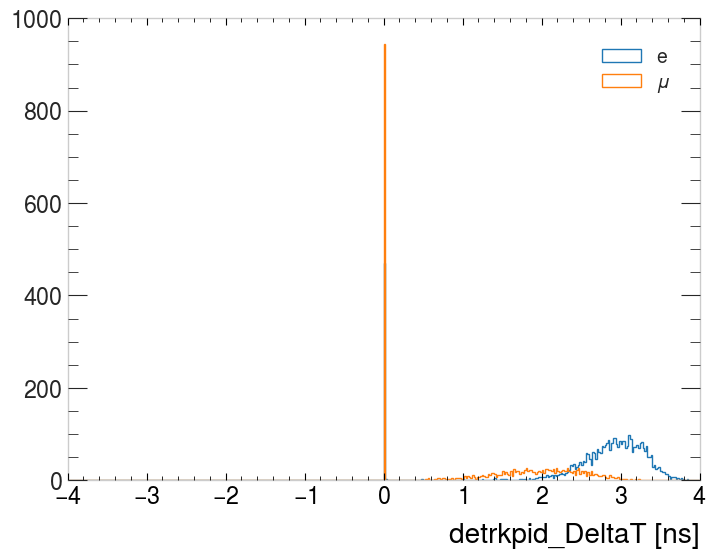

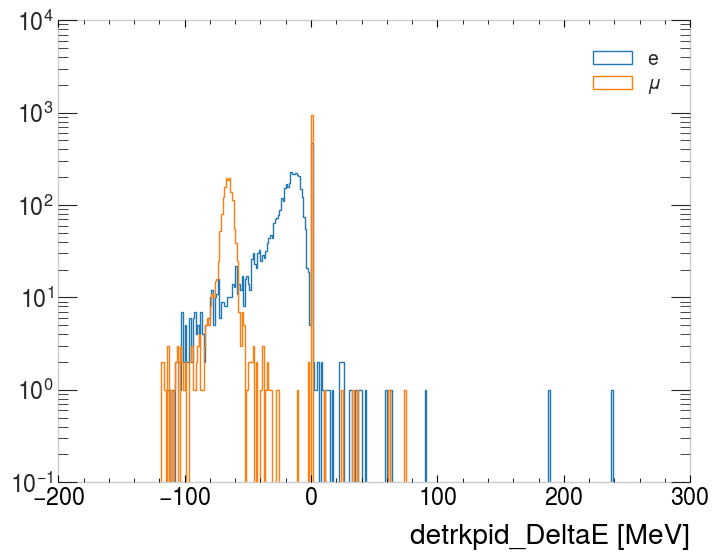

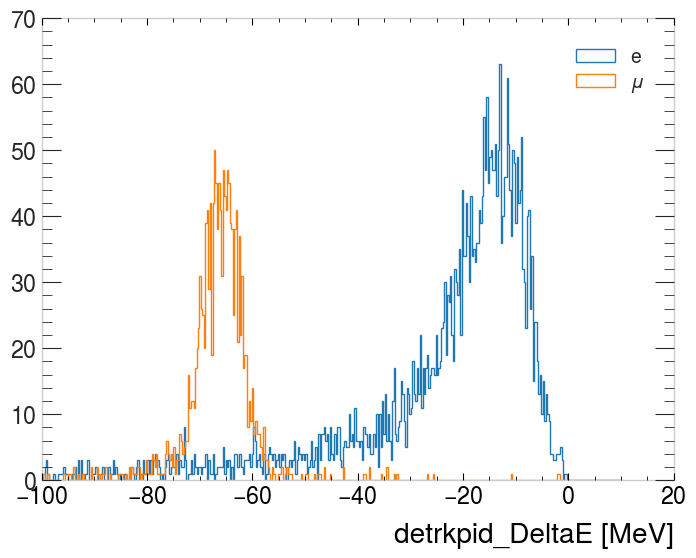

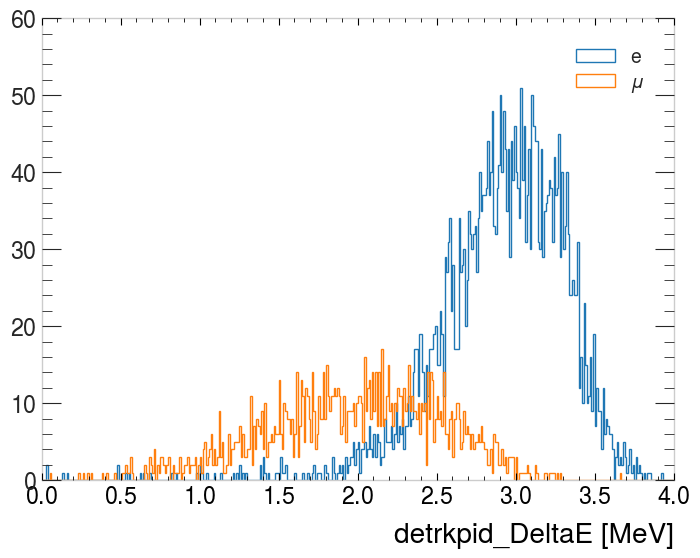

In [29]:
plt.figure()
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 11')['detrkpid_DeltaT'], bins = 400, range=(-4,4), histtype='step', label='e');
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 13')['detrkpid_DeltaT'], bins = 400, range=(-4,4), histtype='step', label='$\mu$');
plt.xlabel('detrkpid_DeltaT [ns]')
#plt.yscale('log')
plt.legend()

plt.figure()
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 11 ')['detrkpid_DeltaE'], bins = 400, range=(-200,300), histtype='step', label='e');
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 13 ')['detrkpid_DeltaE'], bins = 400, range=(-200,300), histtype='step', label='$\mu$');
plt.xlabel('detrkpid_DeltaE [MeV]')
plt.yscale('log')
plt.legend()

plt.figure()
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 11 & detrkpid_DeltaE<0')['detrkpid_DeltaE'], bins = 400, range=(-100,10), histtype='step', label='e');
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 13 & detrkpid_DeltaE<0')['detrkpid_DeltaE'], bins = 400, range=(-100,10), histtype='step', label='$\mu$');
plt.xlabel('detrkpid_DeltaE [MeV]')
#plt.yscale('log')
plt.legend()

plt.figure()
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 11 & detrkpid_DeltaE<0')['detrkpid_DeltaT'], bins = 400, range=(0,4), histtype='step', label='e');
plt.hist(df.query(cut_extmom+'& abs(demc_pdg) == 13 & detrkpid_DeltaE<0')['detrkpid_DeltaT'], bins = 400, range=(0,4), histtype='step', label='$\mu$');
plt.xlabel('detrkpid_DeltaE [MeV]')
#plt.yscale('log')
plt.legend()